# Database management optimisation

----------------------------------------------------------------------------------------------------------------------

### Summary

* [Dataset cleanup](#chapitre1)

* [Joining DataFrames](#chapitre2)

* [Outliers and zscore](#chapitre3)

* [Graphs](#chapitre4)

    * [Box plot](#section4_1)
    * [Scatter plot](#section4_2)
    
* [Turnover](#chapitre5)

## Dataset cleanup<a class="anchor" id="chapitre1"></a>

In [1]:
# Import librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import excel file
liaison = pd.read_excel('liaison.xlsx')

/Users/antoinebergounhe/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [3]:
# Rename the column to have a primary key
liaison.rename(columns={'id_web':'sku'}, inplace=True)

In [4]:
# Retrieve general information from the df
liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   sku         734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


In [5]:
# Check for duplicates
liaison.loc[liaison[['product_id', 'sku']].duplicated(keep=False),:]

,product_id,sku


In [6]:
# Remove null values
liaison.dropna(subset=['sku'], inplace=True)

In [7]:
# Check the number of null values
liaison.isnull().sum()

product_id    0
sku           0
dtype: int64

In [8]:
# Import excel file
erp = pd.read_excel('erp.xlsx')

/Users/antoinebergounhe/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [9]:
# Retrieve general informations from the df
erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


In [10]:
# Check for duplicates
erp.loc[erp[['product_id', 'onsale_web', 'price', 'stock_quantity', 'stock_status']].duplicated(keep=False),:]

,product_id,onsale_web,price,stock_quantity,stock_status


In [11]:
# Remove unnecessary columns
erp.drop(['onsale_web', 'stock_quantity', 'stock_status'], axis=1 ,inplace=True)

In [12]:
# Check null values
erp.isnull().sum()

product_id    0
price         0
dtype: int64

In [13]:
# Import excel file
web = pd.read_excel('web.xlsx')

/Users/antoinebergounhe/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [14]:
# Remove unnecessary columns
web.drop(['virtual', 'downloadable', 'rating_count', 'average_rating', 'tax_class', 'post_content_filtered', 'post_parent', 'post_excerpt', 'comment_status', 'ping_status', 'post_password', 'guid', 'menu_order', 'post_mime_type', 'comment_count', 'post_content', 'post_author', 'post_date_gmt', 'post_date', 'post_modified_gmt', 'post_name', 'post_status', 'post_modified', 'tax_status'], axis=1 ,inplace=True)

In [15]:
# Retrieve general informations from the df
web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sku          1428 non-null   object 
 1   total_sales  1430 non-null   float64
 2   post_title   1430 non-null   object 
 3   post_type    1430 non-null   object 
dtypes: float64(1), object(3)
memory usage: 47.4+ KB


In [16]:
# Check for duplicates
web.loc[web[['sku', 'total_sales', 'post_title', 'post_type']].duplicated(keep=False),:]

,sku,total_sales,post_title,post_type
178,NaN,NaN,NaN,NaN
179,NaN,NaN,NaN,NaN
227,NaN,NaN,NaN,NaN
230,NaN,NaN,NaN,NaN
231,NaN,NaN,NaN,NaN
...,...,...,...,...
792,NaN,NaN,NaN,NaN
793,NaN,NaN,NaN,NaN
794,NaN,NaN,NaN,NaN
795,NaN,NaN,NaN,NaN


In [17]:
# Remove null values from the 'sku' column
web.dropna(subset=['sku'], inplace=True)

# Filtering the 'post_type' column to keep 'product' type
web = web.loc[web['post_type'] == 'product']

----------------------------------------------------------------------------------------------------------------------

## Joining DataFrames<a class="anchor" id="chapitre2"></a>

In [18]:
# Joining two dataframes with the primary key 'product_id'
liaison_erp = pd.merge(liaison,erp, how='inner', on=['product_id'])
liaison_erp

,product_id,sku,price
0,3847,15298,24.2
1,3849,15296,34.3
2,3850,15300,20.8
3,4032,19814,14.1
4,4039,19815,46.0
...,...,...,...
729,7023,15891,27.5
730,7025,15887,69.0
731,7247,13127-1,54.8
732,7329,14680-1,26.5


In [19]:
# Check for duplicates
liaison_erp.loc[liaison_erp[['product_id', 'sku', 'price']].duplicated(keep=False),:]

,product_id,sku,price


In [20]:
# Joining two dataframes with the column 'sku'
# The 'indicator' option is used to create a new '_merge' column to indicate where the row comes from
lew = pd.merge(liaison_erp,web, how='outer', on='sku', indicator=True)

In [21]:
# Check for total null values in each column
lew.isnull().sum()

product_id      0
sku             0
price           0
total_sales    20
post_title     20
post_type      20
_merge          0
dtype: int64

In [22]:
# Check total row from the first dataframe 'liaison_erp'
lew.loc[lew['_merge'] == 'left_only']

,product_id,sku,price,total_sales,post_title,post_type,_merge
185,4289,13771,22.8,NaN,NaN,NaN,left_only
227,4568,15065,21.5,NaN,NaN,NaN,left_only
230,4584,14785,32.3,NaN,NaN,NaN,left_only
334,4741,12601,12.4,NaN,NaN,NaN,left_only
368,4864,15154,8.3,NaN,NaN,NaN,left_only
371,4869,14360,17.2,NaN,NaN,NaN,left_only
399,4921,15608,13.8,NaN,NaN,NaN,left_only
400,4922,15586,21.5,NaN,NaN,NaN,left_only
443,5018,15272,15.4,NaN,NaN,NaN,left_only
445,5021,15630,17.1,NaN,NaN,NaN,left_only


In [23]:
# Check total row from the second datafram 'liaison_erp'
lew.loc[lew['_merge'] == 'right_only']

,product_id,sku,price,total_sales,post_title,post_type,_merge


In [24]:
# Remove duplicates
lew.drop_duplicates(subset=['product_id', 'sku', 'price', 'total_sales', 'post_title', 'post_type'], inplace=True, ignore_index=True)

In [25]:
# Filtering the '_merge' column to keep only common rows
lew = lew[lew['_merge'] == 'both']

In [26]:
# Check null values
lew.isnull().sum()

product_id     0
sku            0
price          0
total_sales    0
post_title     0
post_type      0
_merge         0
dtype: int64

In [27]:
# Check for duplicates
lew.duplicated().sum()

0

In [28]:
lew.describe()

,product_id,price,total_sales
count,714.000000,714.000000,714.000000
mean,5032.557423,32.493137,4.012605
std,790.510878,27.810525,8.518183
min,3847.000000,5.200000,0.000000
25%,4280.250000,14.100000,0.000000
50%,4796.000000,23.550000,1.000000
75%,5710.500000,42.175000,4.000000
max,7338.000000,225.000000,96.000000


- There are **714** common lines
- The average bottle price is €32.5**, for an average sale per product of €4**.
- The values are more dispersed on the price side than on the sales side
- The minimum price of a bottle is €5.2** and the maximum price is €225**.
- Minimum sales for a product are **0** and maximum sales for a bottle are **96**.

----------------------------------------------------------------------------------------------------------------------

## Outliers and zscore<a class="anchor" id="chapitre3"></a>

In [29]:
# Price outlier calculation based on third quartile plus 1.5 times the interquartile range
price_stats = lew['price'].describe()
q1 = price_stats['25%']
q3 = price_stats['75%']
iqr = q3 - q1
aberrant = q3 + 1.5*iqr # The minimum limit outlier price is 84,28€

# List of outliers in the dataset
prix_aberrant = lew.loc[lew['price'] > aberrant]
prix_aberrant.reset_index()

,index,product_id,sku,price,total_sales,post_title,post_type,_merge
0,63,4115,15382,100.0,0.0,Zind-Humbrecht Riesling Grand Cru Rangen De Th...,product,both
1,65,4132,11668,88.4,0.0,Zind-Humbrecht Pinot Gris Grand Cru Rangen De ...,product,both
2,200,4352,15940,225.0,5.0,Champagne Egly-Ouriet Grand Cru Millésimé 2008,product,both
3,202,4355,12589,126.5,11.0,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,product,both
4,206,4359,13853,85.6,1.0,Champagne Larmandier-Bernier Grand Cru Les Che...,product,both
5,219,4402,3510,176.0,13.0,Cognac Frapin VIP XO,product,both
6,220,4404,3507,108.5,2.0,Cognac Frapin Château de Fontpinot XO,product,both
7,222,4406,7819,157.0,0.0,Cognac Frapin Château de Fontpinot 1989 20 Ans...,product,both
8,223,4407,3509,104.0,1.0,Cognac Frapin Cigar Blend,product,both
9,229,4582,12857,109.6,0.0,Château de Meursault Puligny-Montrachet 1er Cr...,product,both


**After checking these products, these are the usual market prices**.

In [30]:
# Calculation of zscore for price and total sales to identify outliers
list = ['price', 'total_sales']

for col in list :
    list = col + '_zscore'
    lew[list] = (lew[col] - lew[col].mean()) / lew[col].std(ddof=0)
    
lew

,product_id,sku,price,total_sales,post_title,post_type,_merge,price_zscore,total_sales_zscore
0,3847,15298,24.2,6.0,Pierre Jean Villa Saint-Joseph Préface 2018,product,both,-0.298410,0.233476
1,3849,15296,34.3,0.0,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,product,both,0.065016,-0.471394
2,3850,15300,20.8,0.0,Pierre Jean Villa Crozes-Hermitage Accroche Co...,product,both,-0.420752,-0.471394
3,4032,19814,14.1,3.0,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,product,both,-0.661837,-0.118959
4,4039,19815,46.0,0.0,Pierre Jean Villa Côte Rôtie Carmina 2017,product,both,0.486015,-0.471394
...,...,...,...,...,...,...,...,...,...
728,6930,16135,8.4,5.0,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,product,both,-0.866939,0.115997
729,7023,15891,27.5,0.0,Camin Larredya Jurançon Sec La Virada 2018,product,both,-0.179667,-0.471394
730,7025,15887,69.0,0.0,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,product,both,1.313620,-0.471394
731,7247,13127-1,54.8,0.0,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,product,both,0.802664,-0.471394


----------------------------------------------------------------------------------------------------------------------

## Graphs<a class="anchor" id="chapitre4"></a>

### Box plot<a class="anchor" id="section4_1"></a>

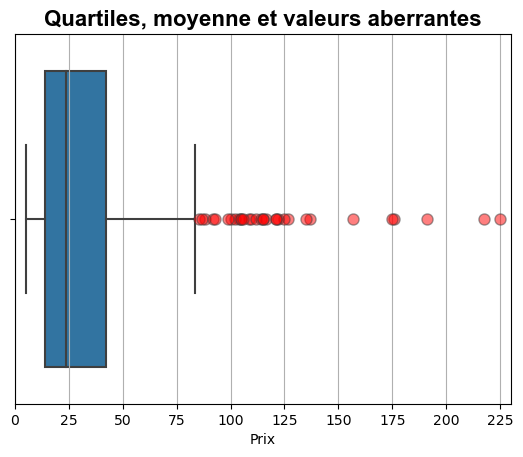

In [31]:
# Creation of a graph including the price variable
graph = sns.boxplot(x=lew['price'], flierprops={'marker': 'o', 'markerfacecolor': 'red', "markersize": 8, "alpha": 0.5})
graph.set_xlabel("Prix")
plt.grid(axis='x')
plt.title('Quartiles, moyenne et valeurs aberrantes', fontname = 'Arial', fontsize=16, fontweight='bold')
plt.xticks(range(0, len(lew['price']) + 1, 25))
graph.set_xlim(left=0, right=230)
plt.show()

### Scatter plot<a class="anchor" id="section4_2"></a>

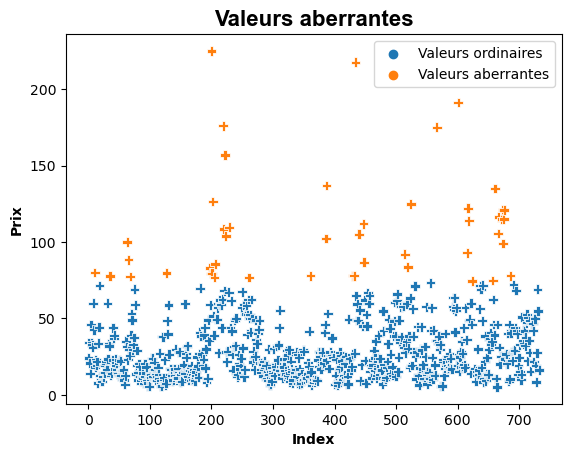

In [32]:
# Creation of variable with a condition
colors = ['Valeurs aberrantes' if zscore > 1.5 else 'Valeurs ordinaires' for zscore in lew['price_zscore']]

# Creation of a scatter plot
ax = sns.scatterplot(data=lew, x=lew.index, y='price', hue=colors, marker='P', s=50)
plt.title('Valeurs aberrantes', fontname='Arial', fontsize=16, fontweight='bold')
plt.ylabel("Prix", fontweight='bold')
plt.xlabel("Index", fontweight='bold')
plt.show()

----------------------------------------------------------------------------------------------------------------------

## Turnover<a class="anchor" id="chapitre5"></a>

In [33]:
# Creation of a new dataframe 'lew_ca' with a new colomn for calculating turnover by product
lew_ca = lew[['product_id', 'sku', 'post_title']].assign(CA_par_produit = lew['price'] * lew['total_sales'])

# Ranking of products with the highest sales
lew_ca.sort_values('CA_par_produit', ascending=False).head(20).reset_index()

,index,product_id,sku,post_title,CA_par_produit
0,195,4334,7818,Champagne Gosset Grand Blanc de Blancs,4704.0
1,71,4144,1662,Champagne Gosset Grand Rosé,4263.0
2,219,4402,3510,Cognac Frapin VIP XO,2288.0
3,70,4142,11641,Champagne Gosset Grand Millésime 2006,1590.0
4,69,4141,304,Champagne Gosset Grande Réserve,1560.0
5,202,4355,12589,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,1391.5
6,200,4352,15940,Champagne Egly-Ouriet Grand Cru Millésimé 2008,1125.0
7,79,4153,16237,Elian Daros Côtes du Marmandais Clos Baquey 2015,1044.0
8,670,6206,16580,Domaine Giudicelli Patrimonio Blanc 2019,1033.2
9,30,4068,16416,Gilles Robin Crozes-Hermitage Rouge Papillon 2019,1029.2


In [35]:
# Calculation of the percentage of products with 0 sales
num_zeros = (lew_ca['CA_par_produit'] == 0).value_counts()[True]
num_total = lew_ca['CA_par_produit'].count()
pourcent = round((num_zeros/num_total)*100,0)

print(f"There are {num_zeros} products that are not sold out of a total of {num_total} products. This represents {pourcent}% of our catalogue on the internet.")

There are 329 products that are not sold out of a total of 714 products. This represents 46.0% of our catalogue on the internet.


In [36]:
# Sum of column 'CA_par_produit' to obtain total sales
ca = lew_ca['CA_par_produit'].sum()

print(f"The turnover on internet is {ca} €.")

The turnover on internet is 70568.6 €.
